In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import time
from datetime import timedelta
import os
import inception
import prettytensor as pt

c:\deeplearning\python3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import cifar10

In [3]:
from cifar10 import num_classes

In [4]:
cifar10.data_path = 'D:\jupyter\\tensorflow_tutorial\\data\CIFAR_10'

In [5]:
class_names = cifar10.load_class_names()
class_names

Loading data: D:\jupyter\tensorflow_tutorial\data\CIFAR_10\cifar-10-batches-py/batches.meta


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [6]:
images_train, cls_train, labels_train = cifar10.load_training_data()

Loading data: D:\jupyter\tensorflow_tutorial\data\CIFAR_10\cifar-10-batches-py/data_batch_1
Loading data: D:\jupyter\tensorflow_tutorial\data\CIFAR_10\cifar-10-batches-py/data_batch_2
Loading data: D:\jupyter\tensorflow_tutorial\data\CIFAR_10\cifar-10-batches-py/data_batch_3
Loading data: D:\jupyter\tensorflow_tutorial\data\CIFAR_10\cifar-10-batches-py/data_batch_4
Loading data: D:\jupyter\tensorflow_tutorial\data\CIFAR_10\cifar-10-batches-py/data_batch_5


In [7]:
images_test, cls_test, labels_test = cifar10.load_test_data()

Loading data: D:\jupyter\tensorflow_tutorial\data\CIFAR_10\cifar-10-batches-py/test_batch


In [8]:
print("Size of:")
print("Training-set:\t\t{}".format(len(images_train)))
print("Test-set:\t\t{}".format(len(images_test)))

Size of:
Training-set:		50000
Test-set:		10000


In [9]:
def plot_images(images, cls_true, cls_pred=None, smooth=True):

    assert len(images) == len(cls_true)

    # Create figure with sub-plots.
    fig, axes = plt.subplots(3, 3)

    # Adjust vertical spacing.
    if cls_pred is None:
        hspace = 0.3
    else:
        hspace = 0.6
    fig.subplots_adjust(hspace=hspace, wspace=0.3)

    # Interpolation type.
    if smooth:
        interpolation = 'spline16'
    else:
        interpolation = 'nearest'

    for i, ax in enumerate(axes.flat):
        # There may be less than 9 images, ensure it doesn't crash.
        if i < len(images):
            # Plot image.
            ax.imshow(images[i],
                      interpolation=interpolation)

            # Name of the true class.
            cls_true_name = class_names[cls_true[i]]

            # Show true and predicted classes.
            if cls_pred is None:
                xlabel = "True: {0}".format(cls_true_name)
            else:
                # Name of the predicted class.
                cls_pred_name = class_names[cls_pred[i]]

                xlabel = "True: {0}\nPred: {1}".format(cls_true_name, cls_pred_name)

            # Show the classes as the label on the x-axis.
            ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

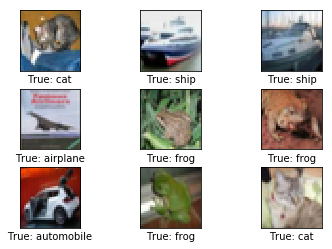

In [10]:
# Get the first images from the test-set.
images = images_test[0:9]

# Get the true classes for those images.
cls_true = cls_test[0:9]

# Plot the images and labels using our helper-function above.
plot_images(images=images, cls_true=cls_true, smooth=False)

In [11]:
inception.data_dir = 'D:\jupyter\\tensorflow_tutorial\\data\Inception'

In [12]:
inception.maybe_download()

Data has apparently already been downloaded and unpacked.


In [13]:
model = inception.Inception()

In [14]:
from inception import transfer_values_cache

In [15]:
file_path_cache_train = os.path.join(cifar10.data_path, 'inception_cifar10_train.pkl')
file_path_cache_test = os.path.join(cifar10.data_path, 'inception_cifar10_test.pkl')

In [16]:
print("Processing Inception transfer-values for training-images ...")

# Scale images because Inception needs pixels to be between 0 and 255,
# while the CIFAR-10 functions return pixels between 0.0 and 1.0
images_scaled = images_train * 255.0

# If transfer-values have already been calculated then reload them,
# otherwise calculate them and save them to a cache-file.
transfer_values_train = transfer_values_cache(cache_path=file_path_cache_train,
                                              images=images_scaled,
                                              model=model)

Processing Inception transfer-values for training-images ...
- Data loaded from cache-file: D:\jupyter\tensorflow_tutorial\data\CIFAR_10\inception_cifar10_train.pkl


In [17]:
print("Processing Inception transfer-values for test-images ...")

# Scale images because Inception needs pixels to be between 0 and 255,
# while the CIFAR-10 functions return pixels between 0.0 and 1.0
images_scaled = images_test * 255.0

# If transfer-values have already been calculated then reload them,
# otherwise calculate them and save them to a cache-file.
transfer_values_test = transfer_values_cache(cache_path=file_path_cache_test,
                                             images=images_scaled,
                                             model=model)

Processing Inception transfer-values for test-images ...
- Data loaded from cache-file: D:\jupyter\tensorflow_tutorial\data\CIFAR_10\inception_cifar10_test.pkl


In [18]:
transfer_values_train.shape

(50000, 2048)

In [19]:
transfer_values_test.shape

(10000, 2048)

In [20]:
def plot_transfer_values(i):
    print("Input image: ")
    
    #plot the i'th image from the test-set.
    plt.imshow(images_test[i], interpolation='nearest')
    plt.show()
    
    print("Transfer-values for the image using Tnception model:")
    
    #Transform the transfer-values into an image.
    img = transfer_values_test[i]
    img = img.reshape((32, 64))
    
    #Plot the image for the transfer-values.
    plt.imshow(img, interpolation='nearest', cmap='Reds')
    plt.show()

Input image: 


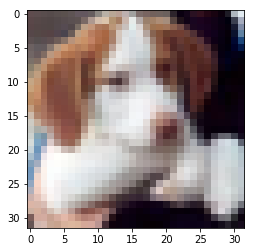

Transfer-values for the image using Tnception model:


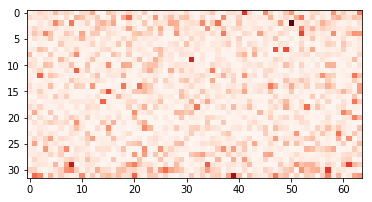

In [21]:
plot_transfer_values(i=16)

Input image: 


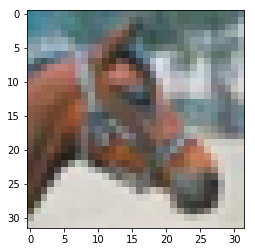

Transfer-values for the image using Tnception model:


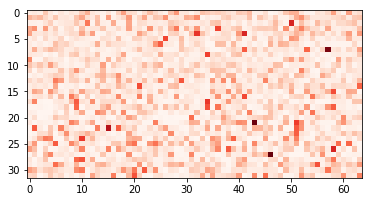

In [22]:
plot_transfer_values(i=17)

In [23]:
#Analysis of Transfer-values using PCA

from sklearn.decomposition import PCA

In [24]:
pca = PCA(n_components=2)

In [25]:
transfer_values = transfer_values_train[0:3000]

In [26]:
cls = cls_train[0:3000]

In [27]:
transfer_values.shape

(3000, 2048)

In [28]:
transfer_values_reduced = pca.fit_transform(transfer_values)

In [29]:
transfer_values_reduced.shape

(3000, 2)

In [30]:
def plot_scatter(values, cls):
    #Create a color-map with a different color for each class.
    import matplotlib.cm as cm
    cmap = cm.rainbow(np.linspace(0.0, 1.0, num_classes))
    
    #Get the color for each sample.
    colors = cmap[cls]
    
    #Extract the x- and y-values.
    x = values[:, 0]
    y = values[:, 1]
    
    #Plot it.
    plt.scatter(x, y, color=colors)
    plt.show()

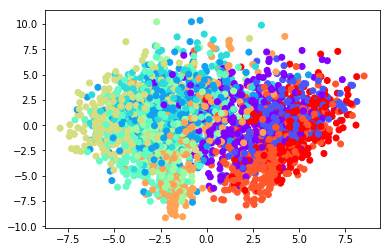

In [31]:
plot_scatter(transfer_values_reduced, cls)

In [32]:
#Analysis of transfer-values using t-SNE

from sklearn.manifold import TSNE

In [33]:
pca = PCA(n_components=50)
transfer_values_50d = pca.fit_transform(transfer_values)

In [34]:
tsne = TSNE(n_components=2)

In [35]:
transfer_values_reduced = tsne.fit_transform(transfer_values_50d)

In [36]:
transfer_values_reduced.shape

(3000, 2)

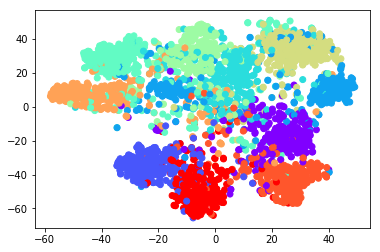

In [37]:
plot_scatter(transfer_values_reduced, cls)

In [38]:
#New classifier in tensorflow

In [39]:
#Placeholder Variables
transfer_len = model.transfer_len

In [40]:
x = tf.placeholder(tf.float32, shape=[None, transfer_len], name='x')

In [41]:
y_true = tf.placeholder(tf.float32, shape=[None, num_classes], name='y_true')

In [42]:
y_true_cls = tf.argmax(y_true, axis=1)

In [43]:
#Neural Network

In [44]:
#Wrap the transfer-values as a Pretty Tensor object.
x_pretty = pt.wrap(x)

with pt.defaults_scope(activation_fn=tf.nn.relu):
    y_pred, loss = x_pretty.\
                    fully_connected(size=1024, name='layer_fc1').\
                    softmax_classifier(num_classes=num_classes, labels=y_true)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



In [45]:
#Optimization Method
global_step = tf.Variable(initial_value=0, name='global_step', trainable=False)

In [46]:
optimizer = tf.train.AdamOptimizer(learning_rate=1e-4).minimize(loss, global_step)

In [47]:
y_pred_cls = tf.argmax(y_pred, axis=1)

In [48]:
correct_prediction = tf.equal(y_pred_cls, y_true_cls)

In [49]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [50]:
#Tensorflow run

In [51]:
session = tf.Session()

In [52]:
session.run(tf.global_variables_initializer())

In [53]:
#Helper-function to get a random training-batch

train_batch_size = 64

In [54]:
def random_batch():
    #Number of images(transfer-values) in the training-set.
    num_images = len(transfer_values_train)
    
    #Create a random index.
    idx = np.random.choice(num_images,
                          size=train_batch_size,
                          replace=False)
    
    #Using the random index to select random x and y-values.
    #We use the transfer_values instead of images as x-values.
    x_batch = transfer_values_train[idx]
    y_batch = labels_train[idx]
    
    return x_batch, y_batch

In [55]:
#Helper function to perform optimization

def optimize(num_iterations):
    # Start-time used for printing time-usage below.
    start_time = time.time()

    for i in range(num_iterations):
        # Get a batch of training examples.
        # x_batch now holds a batch of images (transfer-values) and
        # y_true_batch are the true labels for those images.
        x_batch, y_true_batch = random_batch()

        # Put the batch into a dict with the proper names
        # for placeholder variables in the TensorFlow graph.
        feed_dict_train = {x: x_batch,
                           y_true: y_true_batch}

        # Run the optimizer using this batch of training data.
        # TensorFlow assigns the variables in feed_dict_train
        # to the placeholder variables and then runs the optimizer.
        # We also want to retrieve the global_step counter.
        i_global, _ = session.run([global_step, optimizer],
                                  feed_dict=feed_dict_train)

        # Print status to screen every 100 iterations (and last).
        if (i_global % 100 == 0) or (i == num_iterations - 1):
            # Calculate the accuracy on the training-batch.
            batch_acc = session.run(accuracy,
                                    feed_dict=feed_dict_train)

            # Print status.
            msg = "Global Step: {0:>6}, Training Batch Accuracy: {1:>6.1%}"
            print(msg.format(i_global, batch_acc))

    # Ending time.
    end_time = time.time()

    # Difference between start and end-times.
    time_dif = end_time - start_time

    # Print the time-usage.
    print("Time usage: " + str(timedelta(seconds=int(round(time_dif)))))

In [56]:
#Helper functions for showing results.

In [57]:
def plot_example_errors(cls_pred, correct):
    #This function is called from print_test_accuracy() below.
    
    #cls_pred is an array of the predicted class-number for
    #all images in the test-set.
    
    #correct is a boolean array whether the predicted class
    #is equal to the true class for each image in the test-set.
    
    #Negate the boolean array.
    incorrect = (correct == False)
    
    #Get the images from the test-set that have been
    #incorrectly classified.
    images = images_test[incorrect]
    
    #Get the predicted classes for those images.
    cls_pred = cls_pred[incorrect]
    
    #Get the true classes for those images.
    cls_true = cls_test[incorrect]
    
    n = min(9, len(images))
    
    #Plot the first n images.
    plot_images(images=images[0:n],
               cls_true=cls_true[0:n],
               cls_pred=cls_pred[0:n])

In [58]:
#Helper function to plot confusion matrix

In [59]:
#Import a function from sklearn to calculate the confusion_matrix.
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cls_pred):
    #This is called from print_test_accuracy() below.
    
    # cls_pred is an array of the predicted class-number for
    # all images in the test-set.

    # Get the confusion matrix using sklearn.
    cm = confusion_matrix(y_true=cls_test,  # True class for test-set.
                          y_pred=cls_pred)  # Predicted class.

    # Print the confusion matrix as text.
    for i in range(num_classes):
        # Append the class-name to each line.
        class_name = "({}) {}".format(i, class_names[i])
        print(cm[i, :], class_name)

    # Print the class-numbers for easy reference.
    class_numbers = [" ({0})".format(i) for i in range(num_classes)]
    print("".join(class_numbers))

In [60]:
#Helper-functions for calculating classifications

In [61]:
# Split the data-set in batches of this size to limit RAM usage.
batch_size = 256

def predict_cls(transfer_values, labels, cls_true):
    # Number of images.
    num_images = len(transfer_values)

    # Allocate an array for the predicted classes which
    # will be calculated in batches and filled into this array.
    cls_pred = np.zeros(shape=num_images, dtype=np.int)

    # Now calculate the predicted classes for the batches.
    # We will just iterate through all the batches.
    # There might be a more clever and Pythonic way of doing this.

    # The starting index for the next batch is denoted i.
    i = 0

    while i < num_images:
        # The ending index for the next batch is denoted j.
        j = min(i + batch_size, num_images)

        # Create a feed-dict with the images and labels
        # between index i and j.
        feed_dict = {x: transfer_values[i:j],
                     y_true: labels[i:j]}

        # Calculate the predicted class using TensorFlow.
        cls_pred[i:j] = session.run(y_pred_cls, feed_dict=feed_dict)

        # Set the start-index for the next batch to the
        # end-index of the current batch.
        i = j
        
    # Create a boolean array whether each image is correctly classified.
    correct = (cls_true == cls_pred)

    return correct, cls_pred

In [62]:
#Calculate the predicted class for the test-set.

def predict_cls_test():
    return predict_cls(transfer_values = transfer_values_test,
                       labels = labels_test,
                       cls_true = cls_test)

In [63]:
#Helper-functions for calculating the classification accuracy

In [64]:
def classification_accuracy(correct):
    # When averaging a boolean array, False means 0 and True means 1.
    # So we are calculating: number of True / len(correct) which is
    # the same as the classification accuracy.

    # Return the classification accuracy
    # and the number of correct classifications.
    return correct.mean(), correct.sum()

In [65]:
#Helper-function for showing the classification accuracy

In [66]:
def print_test_accuracy(show_example_errors=False,
                        show_confusion_matrix=False):

    # For all the images in the test-set,
    # calculate the predicted classes and whether they are correct.
    correct, cls_pred = predict_cls_test()
    
    # Classification accuracy and the number of correct classifications.
    acc, num_correct = classification_accuracy(correct)
    
    # Number of images being classified.
    num_images = len(correct)

    # Print the accuracy.
    msg = "Accuracy on Test-Set: {0:.1%} ({1} / {2})"
    print(msg.format(acc, num_correct, num_images))

    # Plot some examples of mis-classifications, if desired.
    if show_example_errors:
        print("Example errors:")
        plot_example_errors(cls_pred=cls_pred, correct=correct)

    # Plot the confusion matrix, if desired.
    if show_confusion_matrix:
        print("Confusion Matrix:")
        plot_confusion_matrix(cls_pred=cls_pred)

In [67]:
#Results of optimization.

In [68]:
print_test_accuracy(show_example_errors=False, show_confusion_matrix=False)

Accuracy on Test-Set: 14.0% (1396 / 10000)


In [69]:
#Performance after 10000 optimization iterations

In [70]:
optimize(num_iterations=10000)

Global Step:    100, Training Batch Accuracy:  89.1%
Global Step:    200, Training Batch Accuracy:  90.6%
Global Step:    300, Training Batch Accuracy:  87.5%
Global Step:    400, Training Batch Accuracy:  89.1%
Global Step:    500, Training Batch Accuracy:  93.8%
Global Step:    600, Training Batch Accuracy:  90.6%
Global Step:    700, Training Batch Accuracy:  85.9%
Global Step:    800, Training Batch Accuracy:  89.1%
Global Step:    900, Training Batch Accuracy:  84.4%
Global Step:   1000, Training Batch Accuracy:  87.5%
Global Step:   1100, Training Batch Accuracy:  90.6%
Global Step:   1200, Training Batch Accuracy:  89.1%
Global Step:   1300, Training Batch Accuracy:  92.2%
Global Step:   1400, Training Batch Accuracy:  82.8%
Global Step:   1500, Training Batch Accuracy:  95.3%
Global Step:   1600, Training Batch Accuracy:  90.6%
Global Step:   1700, Training Batch Accuracy:  93.8%
Global Step:   1800, Training Batch Accuracy:  95.3%
Global Step:   1900, Training Batch Accuracy: 

Accuracy on Test-Set: 90.6% (9060 / 10000)
Example errors:


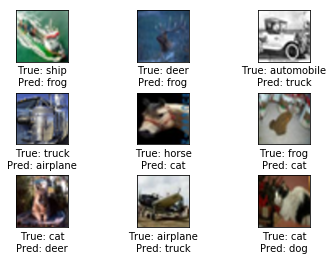

Confusion Matrix:
[896   6  21   4   5   4   1   2  48  13] (0) airplane
[  7 942   2   4   0   4   2   1   5  33] (1) automobile
[ 17   0 891  20  27  11  24   6   2   2] (2) bird
[  5   1  19 803  24 105  27  10   4   2] (3) cat
[  5   0  23  25 879  13  25  27   2   1] (4) deer
[  3   0   9  54  16 899   5  12   1   1] (5) dog
[  3   0  17  16  16   4 940   2   2   0] (6) frog
[  3   0  14  13  20  24   5 914   3   4] (7) horse
[ 23   2   1   3   2   0   3   0 961   5] (8) ship
[  6  36   2   1   0   1   2   1  16 935] (9) truck
 (0) (1) (2) (3) (4) (5) (6) (7) (8) (9)


In [71]:
print_test_accuracy(show_example_errors=True, show_confusion_matrix=True)

In [72]:
model.close()
session.close()